In [1]:
import pandas as pd
from datetime import datetime
import numpy as np 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df  = pd.read_csv('Datasets/test_dataset.csv')
df.head()

,Unnamed: 0,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,...,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN,...,2017-07-13 00:00:00.000000,2017-07-12 17:13:36.000000,301992953.0,2.0,36:45.0,36:38.0,10000.0,11500.0,15.0,NaN
1,1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,...,2017-07-26 00:00:00.000000,2017-07-26 14:14:03.000000,301997095.0,14.0,31:11.0,30:01.0,40000.0,44000.0,30.0,NaN


Calculating age

In [2]:
df['birthdate'] = pd.to_datetime(df['birthdate'])

#we divide by 365.25 to account for leap years
df['age'] = (datetime.now() - df['birthdate']).dt.days / 365.25

#truncate the age
df['age'] = df['age'].apply(np.floor)

#drop the birthdate column
df.drop('birthdate', axis=1, inplace=True)

df.head()

,Unnamed: 0,customerid,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,...,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,age
0,0,8a858f305c8dd672015c93b1db645db4,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN,1.0,...,2017-07-12 17:13:36.000000,301992953.0,2.0,36:45.0,36:38.0,10000.0,11500.0,15.0,NaN,47.0
1,1,8a858f085a477386015a47fb049e49ca,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2,2,8a858e6f5cd5e874015cd6f5634c39ad,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,3,8a858e9d5bfd7037015bfdab79f61305,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
4,4,8a858fde56eb02280156eb6dafc128ac,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,13.0,...,2017-07-26 14:14:03.000000,301997095.0,14.0,31:11.0,30:01.0,40000.0,44000.0,30.0,NaN,42.0


One Hot Encoding the bank_account_type

In [3]:
# one hot encode the bank_account_type column
df = pd.get_dummies(df, columns=['bank_account_type'])
df.head()

,Unnamed: 0,customerid,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,...,approveddate,creationdate,loanamount,totaldue,termdays,referredby,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings
0,0,8a858f305c8dd672015c93b1db645db4,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN,1.0,10000.0,...,36:45.0,36:38.0,10000.0,11500.0,15.0,NaN,47.0,False,False,True
1,1,8a858f085a477386015a47fb049e49ca,3.294513,6.596602,UBA,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,False,True
2,2,8a858e6f5cd5e874015cd6f5634c39ad,8.501912,7.729364,First Bank,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,False,False,True
3,3,8a858e9d5bfd7037015bfdab79f61305,3.318904,6.681595,UBA,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,False,False,True
4,4,8a858fde56eb02280156eb6dafc128ac,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,13.0,370000.0,...,31:11.0,30:01.0,40000.0,44000.0,30.0,NaN,42.0,False,False,True


Dropping columns most_referred_by, bank_branch_clients, referredby

In [4]:
df = df.drop(columns=['bank_branch_clients', 'referredby', 'most_referredby'], axis=1)
df.head()

,Unnamed: 0,customerid,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,...,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings
0,0,8a858f305c8dd672015c93b1db645db4,5.296628,7.593965,Heritage Bank,Permanent,NaN,1.0,10000.0,13000.0,...,2.0,36:45.0,36:38.0,10000.0,11500.0,15.0,47.0,False,False,True
1,1,8a858f085a477386015a47fb049e49ca,3.294513,6.596602,UBA,Permanent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,False,True
2,2,8a858e6f5cd5e874015cd6f5634c39ad,8.501912,7.729364,First Bank,Permanent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,False,False,True
3,3,8a858e9d5bfd7037015bfdab79f61305,3.318904,6.681595,UBA,Permanent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,False,False,True
4,4,8a858fde56eb02280156eb6dafc128ac,6.354624,4.949031,First Bank,Self-Employed,NaN,13.0,370000.0,412800.0,...,14.0,31:11.0,30:01.0,40000.0,44000.0,30.0,42.0,False,False,True


Label Encoding the Employment_status_clients and the Level_of_education_clients

In [5]:
label_encoder = preprocessing.LabelEncoder()

df['employment_status_clients'] = label_encoder.fit_transform(df['employment_status_clients'])
df['level_of_education_clients'] = label_encoder.fit_transform(df['level_of_education_clients'])

print(df['employment_status_clients'].unique())
print(df['level_of_education_clients'].unique())

[1 3 6 4 0 5 2]
[4 1 0 3 2]


Amount of time taken to close the loan

In [6]:
# converting from object to datetime
df['last_closeddate'] = pd.to_datetime(df['last_closeddate'])
df['last_creationdate'] = pd.to_datetime(df['last_creationdate'])

loan_close_time = (df['last_closeddate'] - df['last_creationdate']).dt.days
df['loan_close_time'] = loan_close_time  

print(df[["last_closeddate", "last_creationdate", "loan_close_time"]].head())

      last_closeddate   last_creationdate  loan_close_time
0 2017-07-12 17:23:46 2017-06-11 12:14:02             31.0
1                 NaT                 NaT              NaN
2                 NaT                 NaT              NaN
3                 NaT                 NaT              NaN
4 2017-07-26 14:24:12 2017-06-26 16:07:58             29.0


Amount of time for loan to be approved

In [7]:
df['last_approveddate'] = pd.to_datetime(df['last_approveddate'])

loan_approval_time = (df['last_approveddate'] - df['last_creationdate']).dt.seconds/3600  #convert to hours
df['loan_approval_time'] = loan_approval_time

print(df[["last_approveddate", "last_creationdate", "loan_approval_time"]].head())

    last_approveddate   last_creationdate  loan_approval_time
0 2017-06-11 13:15:09 2017-06-11 12:14:02            1.018611
1                 NaT                 NaT                 NaN
2                 NaT                 NaT                 NaN
3                 NaT                 NaT                 NaN
4 2017-06-26 17:08:05 2017-06-26 16:07:58            1.001944


Amount of time taken before the first payment

In [8]:
df['last_firstrepaiddate'] = pd.to_datetime(df['last_firstrepaiddate'])

loan_firstPayment_time = (df['last_firstrepaiddate'] - df['last_approveddate']).dt.days
df['loan_firstPayment_time'] = loan_firstPayment_time

print(df[["last_firstrepaiddate", "last_approveddate", "loan_firstPayment_time"]].head())

  last_firstrepaiddate   last_approveddate  loan_firstPayment_time
0  2017-07-12 17:13:36 2017-06-11 13:15:09                    31.0
1                  NaT                 NaT                     NaN
2                  NaT                 NaT                     NaN
3                  NaT                 NaT                     NaN
4  2017-07-26 14:14:03 2017-06-26 17:08:05                    29.0


Clustering the longitudes and latitudes

c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

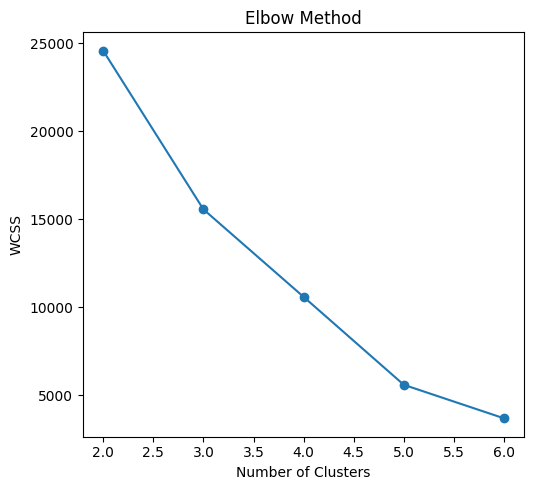

In [9]:
# using the elbow method to get the number of clusters
# wcss = within cluster sum of squares

geo_data = df.iloc[:,2:4]

k_range = range(2,7)
wcss_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(geo_data)
    wcss_values.append(kmeans.inertia_) 

#plotting the elbow method
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(k_range, wcss_values, marker ='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

In [11]:
k = 3
kmeans = KMeans(n_clusters=k)

kmeans.fit(geo_data)

identified_clusters = kmeans.fit_predict(geo_data)
clustered_data = df.copy()

clustered_data['Cluster'] = identified_clusters

df = df.drop(columns = ['longitude_gps', 'latitude_gps'], axis=1)
df.head(20)

c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,...,loanamount,totaldue,termdays,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,0,8a858f305c8dd672015c93b1db645db4,Heritage Bank,1,4,1.0,10000.0,13000.0,30.000000,2017-06-11 13:15:09,...,10000.0,11500.0,15.0,47.0,False,False,True,31.0,1.018611,31.0
1,1,8a858f085a477386015a47fb049e49ca,UBA,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,45.0,False,False,True,NaN,NaN,NaN
2,2,8a858e6f5cd5e874015cd6f5634c39ad,First Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,40.0,False,False,True,NaN,NaN,NaN
3,3,8a858e9d5bfd7037015bfdab79f61305,UBA,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,41.0,False,False,True,NaN,NaN,NaN
4,4,8a858fde56eb02280156eb6dafc128ac,First Bank,3,4,13.0,370000.0,412800.0,23.076923,2017-06-26 17:08:05,...,40000.0,44000.0,30.0,42.0,False,False,True,29.0,1.001944,29.0
5,5,8a858e695775665c015779a1a5cc1192,Access Bank,3,1,7.0,70000.0,89500.0,27.857143,2017-06-08 11:06:02,...,20000.0,24500.0,30.0,35.0,False,True,False,32.0,1.001944,32.0
6,6,8a858e225c404292015c4e2b42c67bbe,First Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,38.0,False,False,True,NaN,NaN,NaN
7,7,8a858fcf5b39c3ba015b3d9f215c3922,GT Bank,6,4,2.0,20000.0,26000.0,30.000000,2017-06-10 22:09:54,...,10000.0,11500.0,15.0,45.0,False,False,True,39.0,1.001667,39.0
8,8,8a858edd5c8348c4015c8452bc364cd7,Stanbic IBTC,6,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,42.0,False,False,True,NaN,NaN,NaN
9,9,8a858ef25c8393f8015c86783932595b,Diamond Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,33.0,False,False,True,NaN,NaN,NaN


In [12]:
df.to_csv('Datasets/cleaned_and_encoded_test_data.csv')